In [2]:
#Importing Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Importing Files
df = pd.read_csv('amazon.csv')

In [5]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [6]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [7]:
df.shape

(1465, 16)

In [8]:
df.dtypes

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object

In [9]:
# Create a helper function to clean and convert price columns
def clean_and_convert_price(price_column):
    # Convert to string, remove ₹ and commas, then convert to float
    price_column = price_column.astype(str)  # Ensure it's a string
    price_column = price_column.str.replace("₹", '', regex=True)  # Remove rupee symbol
    price_column = price_column.str.replace(",", '', regex=True)  # Remove commas
    price_column = price_column.astype(float)  # Convert to float
    return price_column

# Apply the function to both 'discounted_price' and 'actual_price'
df['discounted_price'] = clean_and_convert_price(df['discounted_price'])
df['actual_price'] = clean_and_convert_price(df['actual_price'])


In [10]:
#Changing Datatype and values in Discount Percentage

df['discount_percentage'] = df['discount_percentage'].str.replace('%','').astype('float64')

df['discount_percentage'] = df['discount_percentage'] / 100

df['discount_percentage']

0       0.64
1       0.43
2       0.90
3       0.53
4       0.61
        ... 
1460    0.59
1461    0.25
1462    0.28
1463    0.26
1464    0.22
Name: discount_percentage, Length: 1465, dtype: float64

In [11]:
df['rating'].value_counts()

rating
4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
5.0      3
3.0      3
4.8      3
3.2      2
2.8      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: count, dtype: int64

In [12]:
df.query('rating == "|"')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,0.16,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


In [13]:
df['rating'] = (
    df['rating']
    .astype(str)  
    .str.replace('|', '4.0', regex=False)  
)

df['rating'] = pd.to_numeric(df['rating'], errors='coerce').fillna(0.0)


In [14]:
df['rating_count'] = df['rating_count'].str.replace(',', '').astype('float64')

In [15]:
duplicates = df.duplicated()
df[duplicates]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link


In [16]:
df.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [17]:
df1 = df[['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].copy()

In [18]:
catsplit = df['category'].str.split('|', expand=True)
catsplit

,0,1,2,3,4,5,6
0,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
2,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
3,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
4,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
...,...,...,...,...,...,...,...
1460,Home&Kitchen,Kitchen&HomeAppliances,WaterPurifiers&Accessories,WaterPurifierAccessories,None,None,None
1461,Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances,Rice&PastaCookers,None,None,None
1462,Home&Kitchen,"Heating,Cooling&AirQuality",RoomHeaters,HeatConvectors,None,None,None
1463,Home&Kitchen,"Heating,Cooling&AirQuality",Fans,ExhaustFans,None,None,None


In [19]:
catsplit = catsplit.rename(columns={0:'category_1', 1:'category_2', 2:'category_3'})

In [20]:
df1['category_1'] = catsplit['category_1']
df1['category_2'] = catsplit['category_2']

df1.drop(columns='category', inplace=True)

df1

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,category_1,category_2
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,Computers&Accessories,Accessories&Peripherals
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,Computers&Accessories,Accessories&Peripherals
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,3.9,7928.0,Computers&Accessories,Accessories&Peripherals
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,4.2,94363.0,Computers&Accessories,Accessories&Peripherals
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,0.61,4.2,16905.0,Computers&Accessories,Accessories&Peripherals
...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,379.0,919.0,0.59,4.0,1090.0,Home&Kitchen,Kitchen&HomeAppliances
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,2280.0,3045.0,0.25,4.1,4118.0,Home&Kitchen,Kitchen&HomeAppliances
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,2219.0,3080.0,0.28,3.6,468.0,Home&Kitchen,"Heating,Cooling&AirQuality"
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,1399.0,1890.0,0.26,4.0,8031.0,Home&Kitchen,"Heating,Cooling&AirQuality"


In [21]:
df1['category_1'].value_counts()

category_1
Electronics              526
Computers&Accessories    453
Home&Kitchen             448
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: count, dtype: int64

In [22]:
df1['category_1'] = df1['category_1'].str.replace('&', ' & ')
df1['category_1'] = df1['category_1'].str.replace('OfficeProducts', 'Office Products')
df1['category_1'] = df1['category_1'].str.replace('MusicalInstruments', 'Musical Instruments')
df1['category_1'] = df1['category_1'].str.replace('HomeImprovement', 'Home Improvement')

In [23]:
df1['category_2'].value_counts()

category_2
Accessories&Peripherals                    381
Kitchen&HomeAppliances                     308
HomeTheater,TV&Video                       162
Mobiles&Accessories                        161
Heating,Cooling&AirQuality                 116
WearableTechnology                          76
Headphones,Earbuds&Accessories              66
NetworkingDevices                           34
OfficePaperProducts                         27
ExternalDevices&DataStorage                 18
Cameras&Photography                         16
HomeStorage&Organization                    16
HomeAudio                                   16
GeneralPurposeBatteries&BatteryChargers     14
Accessories                                 14
Printers,Inks&Accessories                   11
CraftMaterials                               7
Components                                   5
OfficeElectronics                            4
Electrical                                   2
Monitors                                     2
Mi

In [24]:
df1['category_2'] = df1['category_2'].str.replace('&', ' & ')
df1['category_2'] = df1['category_2'].str.replace(',', ', ')
df1['category_2'] = df1['category_2'].str.replace('HomeAppliances', 'Home Appliances')
df1['category_2'] = df1['category_2'].str.replace('AirQuality', 'Air Quality')
df1['category_2'] = df1['category_2'].str.replace('WearableTechnology', 'Wearable Technology')
df1['category_2'] = df1['category_2'].str.replace('NetworkingDevices', 'Networking Devices')
df1['category_2'] = df1['category_2'].str.replace('OfficePaperProducts', 'Office Paper Products')
df1['category_2'] = df1['category_2'].str.replace('ExternalDevices', 'External Devices')
df1['category_2'] = df1['category_2'].str.replace('DataStorage', 'Data Storage')
df1['category_2'] = df1['category_2'].str.replace('HomeStorage', 'Home Storage')
df1['category_2'] = df1['category_2'].str.replace('HomeAudio', 'Home Audio')
df1['category_2'] = df1['category_2'].str.replace('GeneralPurposeBatteries', 'General Purpose Batteries')
df1['category_2'] = df1['category_2'].str.replace('BatteryChargers', 'Battery Chargers')
df1['category_2'] = df1['category_2'].str.replace('CraftMaterials', 'Craft Materials')
df1['category_2'] = df1['category_2'].str.replace('OfficeElectronics', 'Office Electronics')
df1['category_2'] = df1['category_2'].str.replace('PowerAccessories', 'Power Accessories')
df1['category_2'] = df1['category_2'].str.replace('CarAccessories', 'Car Accessories')
df1['category_2'] = df1['category_2'].str.replace('HomeMedicalSupplies', 'Home Medical Supplies')
df1['category_2'] = df1['category_2'].str.replace('HomeTheater', 'Home Theater')

In [25]:
df1['product_id'].str.strip()

0       B07JW9H4J1
1       B098NS6PVG
2       B096MSW6CT
3       B08HDJ86NZ
4       B08CF3B7N1
           ...    
1460    B08L7J3T31
1461    B01M6453MB
1462    B009P2LIL4
1463    B00J5DYCCA
1464    B01486F4G6
Name: product_id, Length: 1465, dtype: object

In [26]:
rating_score = []

for score in df1['rating']:
    if score < 2.0 : rating_score.append('Poor')
    elif score < 3.0 : rating_score.append('Below Average')
    elif score < 4.0 : rating_score.append('Average')
    elif score < 5.0 : rating_score.append('Above Average')
    elif score == 5.0 : rating_score.append('Excellent')

In [27]:
df1['rating_score'] = rating_score

df1['rating_score'] = df1['rating_score'].astype('category')

In [28]:
df1['rating_score'] = df1['rating_score'].cat.reorder_categories(['Below Average', 'Average', 'Above Average', 'Excellent'], ordered=True)

In [29]:
df1['difference_price'] = df1['actual_price'] - df1['discounted_price']

In [30]:
reviewers = df[['user_id','user_name']]
reviewers

,user_id,user_name
0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp..."
1,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac..."
2,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal..."
3,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ..."
4,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK..."
...,...,...
1460,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome..."
1461,"AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH..."
1462,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","Nehal Desai,Danish Parwez,Amazon Customer,Amaz..."
1463,"AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...","Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan..."


In [31]:
reviewer_id_split = reviewers['user_id'].str.split(',', expand=False)

reviewer_id_split

0       [AG3D6O4STAQKAY2UVGEUV46KN35Q, AHMY5CWJMMK5BJR...
1       [AECPFYFQVRUWC3KGNLJIOREFP5LQ, AGYYVPDD7YG7FYN...
2       [AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA, AESFLDV2PT363T2...
3       [AEWAZDZZJLQUYVOVGBEUKSLXHQ5A, AG5HTSFRRE6NL3M...
4       [AE3Q6KSUK5P75D5HFYHCRAOLODSA, AFUGIFH5ZAFXRDS...
                              ...                        
1460    [AHITFY6AHALOFOHOZEOC6XBP4FEA, AFRABBODZJZQB6Z...
1461    [AFG5FM3NEMOL6BNFRV2NK5FNJCHQ, AGEINTRN6Z563RM...
1462    [AGVPWCMAHYQWJOQKMUJN4DW3KM5Q, AF4Q3E66MY4SR7Y...
1463    [AF2JQCLSCY3QJATWUNNHUSVUPNQQ, AFDMLUXC5LS5RXD...
1464    [AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA, AG7QNJ2SCS5VS5V...
Name: user_id, Length: 1465, dtype: object

In [32]:
reviewer_id_exp = reviewer_id_split.explode()

reviewer_id_clean = reviewer_id_exp.reset_index(drop=True)

reviewer_id_clean

0        AG3D6O4STAQKAY2UVGEUV46KN35Q
1        AHMY5CWJMMK5BJRBBSNLYT3ONILA
2        AHCTC6ULH4XB6YHDY6PCH2R772LQ
3        AGYHHIERNXKA6P5T7CZLXKVPT7IQ
4        AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q
                     ...             
11498    AHXCDNSXAESERITAFELQABFVNLCA
11499    AGRZD6CHLCUNOLMMIMIHUCG7PIFA
11500    AFQZVGSOSOJHKFQQMCEI4725QEKQ
11501    AEALVGXXIP46OZVXKRUXSDWZJMEA
11502    AGEFL3AY7YXEFZA4ZJU3LP7K7OJQ
Name: user_id, Length: 11503, dtype: object

In [33]:
reviewer_name_split = reviewers['user_name'].str.split(',', expand=False)

reviewer_name_split

0       [Manav, Adarsh gupta, Sundeep, S.Sayeed Ahmed,...
1       [ArdKn, Nirbhay kumar, Sagar Viswanathan, Asp,...
2       [Kunal, Himanshu, viswanath, sai niharka, saqi...
3       [Omkar dhale, JD, HEMALATHA, Ajwadh a., amar s...
4       [rahuls6099, Swasat Borah, Ajay Wadke, Pranali...
                              ...                        
1460    [Prabha ds, Raghuram bk, Real Deal, Amazon Cus...
1461    [Manu Bhai, Naveenpittu, Evatira Sangma, JAGAN...
1462    [Nehal Desai, Danish Parwez, Amazon Customer, ...
1463    [Shubham Dubey, E.GURUBARAN, Mayank S., eusuf ...
1464    [Rajib, Ajay B, Vikas Kahol, PARDEEP, Anindya ...
Name: user_name, Length: 1465, dtype: object

In [34]:
review_name_exp = reviewer_name_split.explode()

reviewer_name_clean = review_name_exp.reset_index(drop=True)

reviewer_name_clean

0                   Manav
1            Adarsh gupta
2                 Sundeep
3          S.Sayeed Ahmed
4          jaspreet singh
               ...       
11510             PARDEEP
11511    Anindya Pramanik
11512         Vikas Singh
11513     Harshada Pimple
11514              Saw a.
Name: user_name, Length: 11515, dtype: object

In [35]:
df21 = pd.DataFrame(data=reviewer_id_clean)
df22 = pd.DataFrame(data=reviewer_name_clean)

In [36]:
df2 = pd.merge(df21, df22, left_index=True, right_index=True)

In [37]:
sns.set_style(style='darkgrid')

sns.set_palette(palette="icefire")

In [38]:
main_sub = df1[['category_1', 'category_2', 'product_id']]

main_sub = main_sub.rename(columns={'category_1' :'Main Category', 'category_2' : 'Sub-Category', 'product_id':'Product ID'})

main_sub_piv = pd.pivot_table(main_sub, index=['Main Category', 'Sub-Category'], aggfunc='count')

main_sub_piv

Product ID
Main Category           Sub-Category                                            
Car & Motorbike         Car Accessories                                        1
Computers & Accessories Accessories & Peripherals                            381
                        Components                                             5
                        External Devices & Data Storage                       18
                        Laptops                                                1
                        Monitors                                               2
                        Networking Devices                                    34
                        Printers, Inks & Accessories                          11
                        Tablets                                                1
Electronics             Accessories                                           14
                        Cameras & Photography                                 16
                        General Purpose Batteries & Battery Chargers          14
                        Headphones, Earbuds & Accessories                     66
                        Home Audio                                            16
                        Home Theater, TV & Video                             162
                        Mobiles & Accessories                                161
                        Power Accessories                                      1
                        Wearable Technology                                   76
Health & PersonalCare   Home Medical Supplies & Equipment                      1
Home & Kitchen          Craft Materials                                        7
                        Heating, Cooling & Air Quality                       116
                        Home Storage & Organization                           16
                        Kitchen & Dining                                       1
                        Kitchen & Home Appliances                            308
Home Improvement        Electrical                                             2
Musical Instruments     Microphones                                            2
Office Products         Office Electronics                                     4
                        Office Paper Products                                 27
Toys & Games            Arts & Crafts                                          1

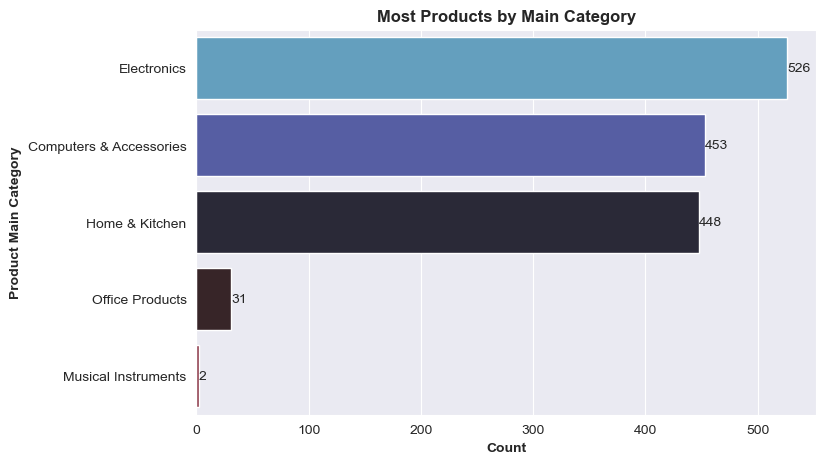

In [39]:
# Top 5 most common main categories
most_main_items = df1['category_1'].value_counts().head(5).rename_axis('category_1').reset_index(name='counts')

# Plot for most products by main category
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(data=most_main_items, x='counts', y='category_1', ax=ax)

ax.set_xlabel('Count', fontweight='bold')
ax.set_ylabel('Product Main Category', fontweight='bold')
ax.set_title('Most Products by Main Category', fontweight='bold', size='large')
ax.bar_label(ax.containers[0])  # Add labels to the bars

plt.show()

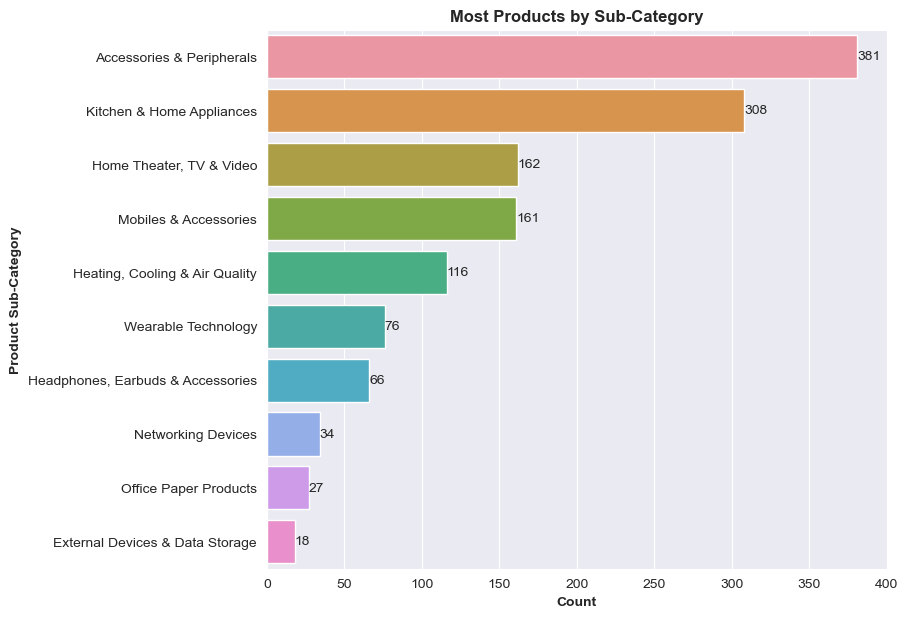

In [40]:
# Top 10 most common sub-categories
most_sub_items = df1['category_2'].value_counts().head(10).rename_axis('category_2').reset_index(name='counts')

# Plot for most products by sub-category
fig, ax = plt.subplots(figsize=(8, 7))
sns.barplot(data=most_sub_items, x='counts', y='category_2', ax=ax)

ax.set_xlabel('Count', fontweight='bold')
ax.set_ylabel('Product Sub-Category', fontweight='bold')
ax.set_title('Most Products by Sub-Category', fontweight='bold', size='large')
ax.bar_label(ax.containers[0])  # Add labels to the bars

plt.show()


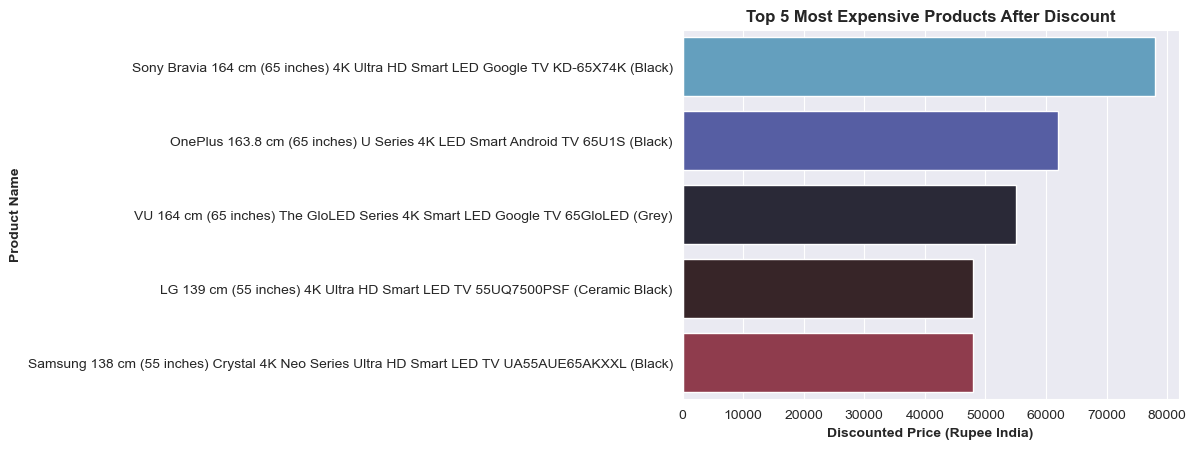

In [41]:
#Top 5 Most Expensive Products After Discount

disc_exp = sns.barplot(data=df1.sort_values('discounted_price', ascending=False).head(5), x='discounted_price', y='product_name')

disc_exp.set_title('Top 5 Most Expensive Products After Discount', fontweight='bold')
disc_exp.set_xlabel('Discounted Price (Rupee India)', fontweight='bold')
disc_exp.set_ylabel('Product Name', fontweight='bold')

plt.show()

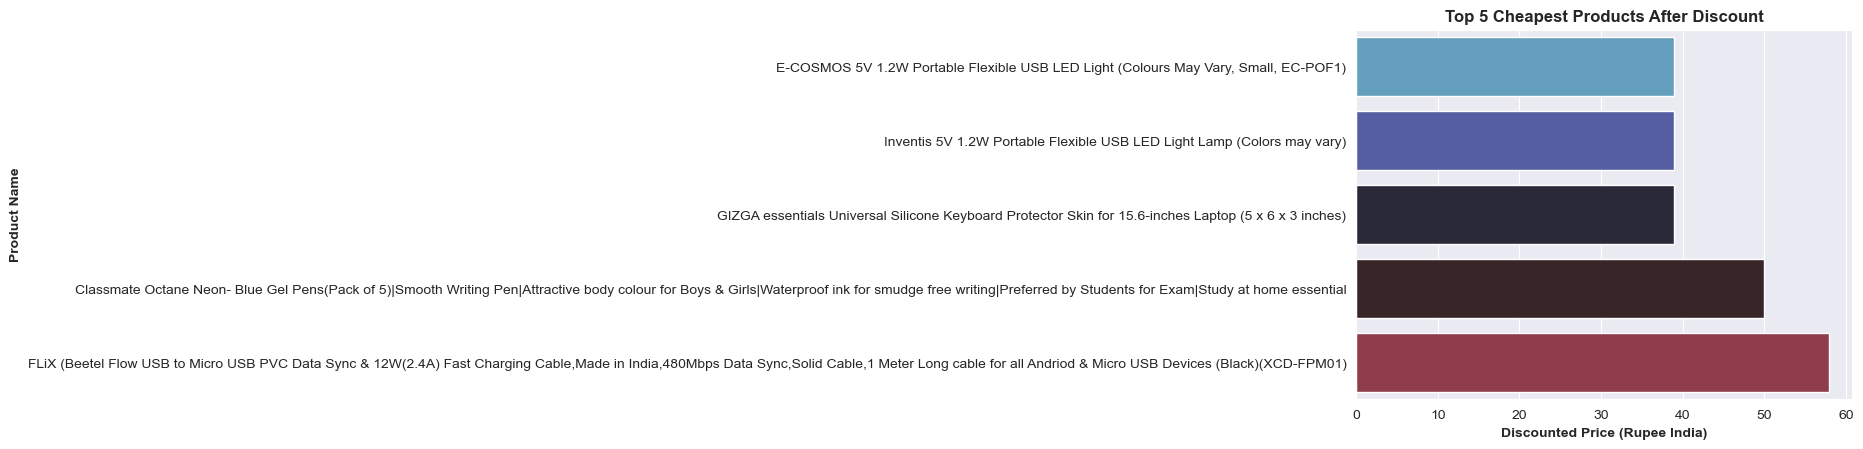

In [42]:
#Top 5 Cheapest Products After Discount

disc_cheap = sns.barplot(data=df1.sort_values('discounted_price').head(5), x='discounted_price', y='product_name')

disc_cheap.set_title('Top 5 Cheapest Products After Discount', fontweight='bold')
disc_cheap.set_xlabel('Discounted Price (Rupee India)', fontweight='bold')
disc_cheap.set_ylabel('Product Name', fontweight='bold')

plt.show()

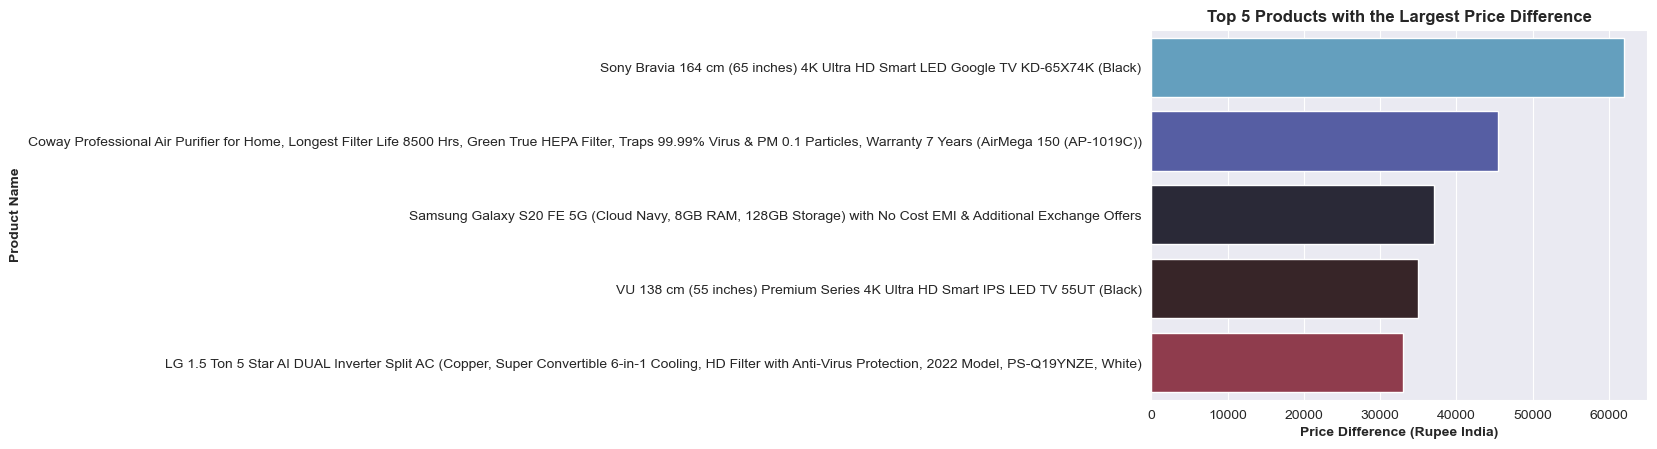

In [43]:
#Top 5 Products with the largest difference in price due to discount

dif_price_large = sns.barplot(data= df1.sort_values('difference_price', ascending=False).head(5), x='difference_price', y='product_name')

dif_price_large.set_title('Top 5 Products with the Largest Price Difference', fontweight='bold')
dif_price_large.set_xlabel('Price Difference (Rupee India)', fontweight='bold')
dif_price_large.set_ylabel('Product Name', fontweight='bold')

plt.show()

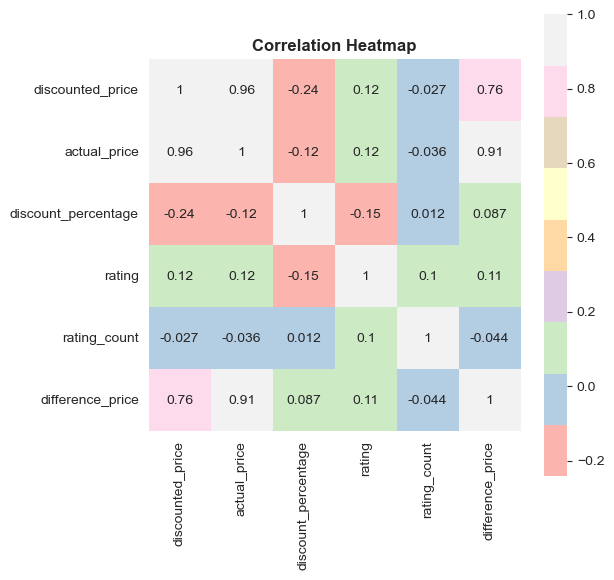

In [44]:
# Filter to only include numeric columns
numeric_df = df1.select_dtypes(include='number')

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Create a single subplot for the heatmap with specific color palette and annotations
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(data=corr_matrix, annot=True, cmap='Pastel1', ax=ax, square=True)

# Set title for the heatmap
ax.set_title('Correlation Heatmap', fontweight='bold', size='large')

# Show the heatmap
plt.show()

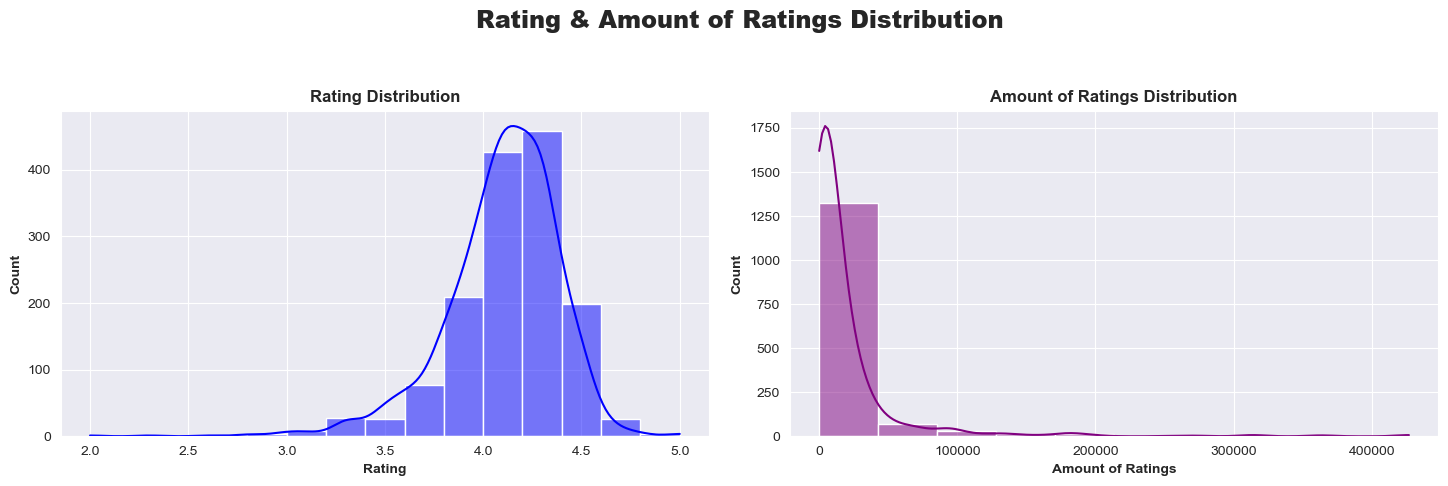

In [45]:
#Rating & Amount of Rating Distribution

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle('Rating & Amount of Ratings Distribution', fontweight='heavy', size='xx-large')

fig.tight_layout(pad=3.0)

sns.histplot(ax=ax[0], data=df1, x='rating', bins=15, kde=True, color='blue')
sns.histplot(ax=ax[1], data=df1, x='rating_count', bins=10, kde=True, color='purple')

ax[0].set_xlabel('Rating', fontweight='bold')
ax[1].set_xlabel('Amount of Ratings', fontweight='bold')

ax[0].set_ylabel('Count', fontweight='bold')
ax[1].set_ylabel('Count', fontweight='bold')

ax[0].set_title('Rating Distribution', fontweight='bold')
ax[1].set_title('Amount of Ratings Distribution', fontweight='bold')

plt.show()

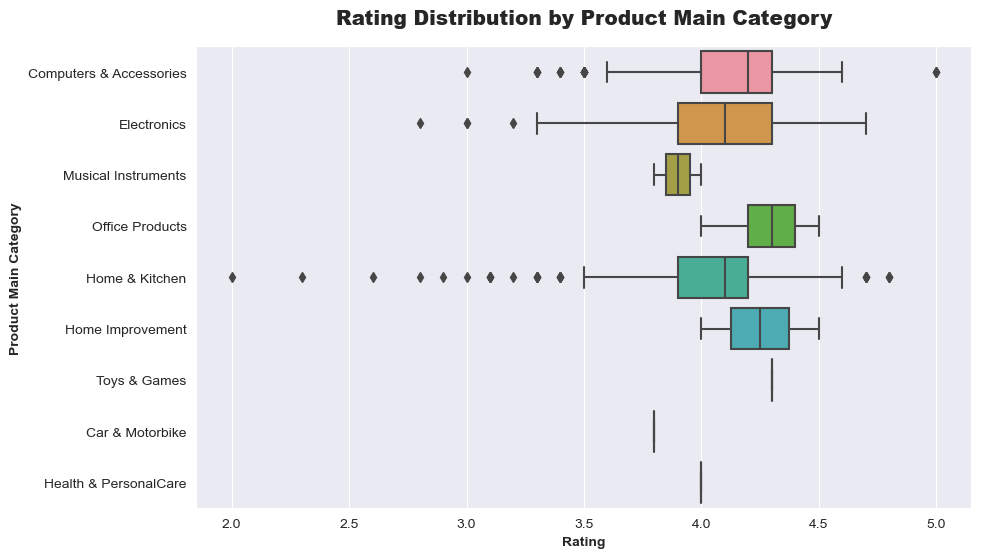

In [46]:
#Rating Distribution by Product Main Category

fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(ax=ax, data=df1, x='rating', y='category_1')

ax.set_xlabel('Rating', fontweight='bold')
ax.set_ylabel('Product Main Category', fontweight='bold')
ax.set_title('Rating Distribution by Product Main Category', fontweight='heavy', size='x-large', y=1.03)

plt.show()

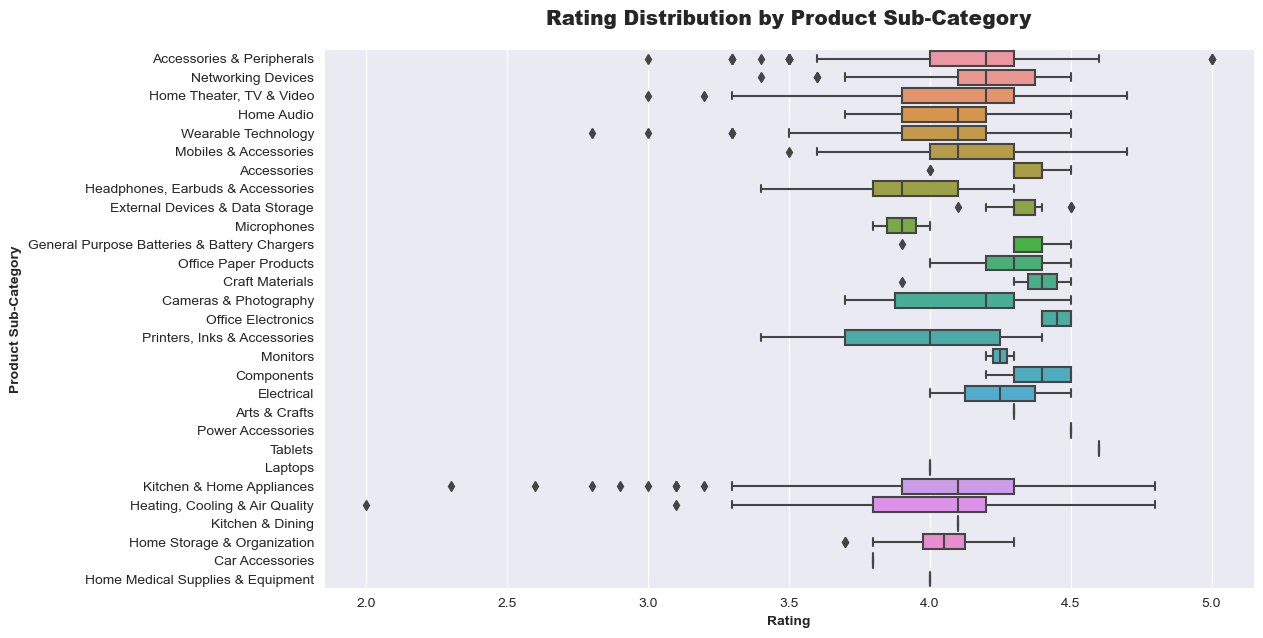

In [47]:
#Rating Distribution by Product Sub-Category

fig, ax = plt.subplots(figsize=(12, 7))

sns.boxplot(ax=ax, data=df1, x='rating', y='category_2')

ax.set_xlabel('Rating', fontweight='bold')
ax.set_ylabel('Product Sub-Category', fontweight='bold')
ax.set_title('Rating Distribution by Product Sub-Category', fontweight='heavy', size='x-large', y=1.03)

plt.show()

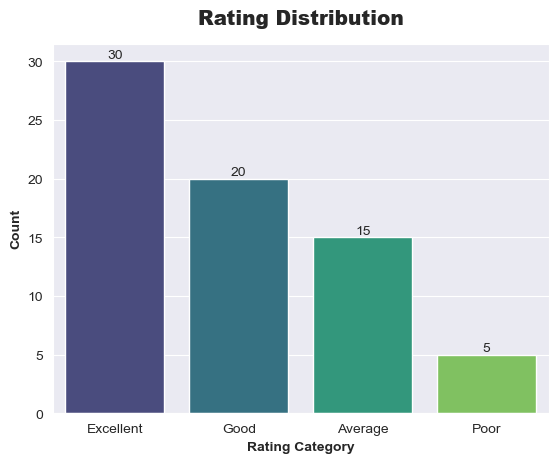

In [48]:
data = {'rating': ['Excellent', 'Good', 'Average', 'Poor'],
        'counts': [30, 20, 15, 5]}
rating_count = pd.DataFrame(data)
rating_ordered = ['Excellent', 'Good', 'Average', 'Poor']
rating_count_plot = sns.barplot(data=rating_count, x='rating', y='counts', order=rating_ordered, palette='viridis')
rating_count_plot.set_xlabel('Rating Category', fontweight='bold')
rating_count_plot.set_ylabel('Count', fontweight='bold')
rating_count_plot.set_title('Rating Distribution', fontweight='heavy', size='x-large', y=1.03)
rating_count_plot.bar_label(rating_count_plot.containers[0])
plt.show()

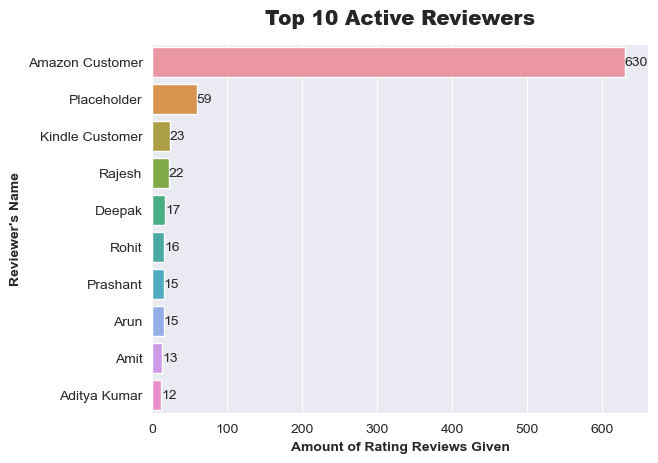

In [49]:
#Reviewers who gave ratings and reviews for more than one product

top_reviewer = data=df2['user_name'].value_counts().head(10).rename_axis('username').reset_index(name='counts')

top_review_plot = sns.barplot(data=top_reviewer, x='counts', y='username')

top_review_plot.bar_label(top_review_plot.containers[0])

top_review_plot.set_xlabel('Amount of Rating Reviews Given', fontweight='bold')
top_review_plot.set_ylabel("Reviewer's Name", fontweight='bold')
top_review_plot.set_title('Top 10 Active Reviewers', fontweight='heavy', size='x-large', y=1.03)

plt.show()

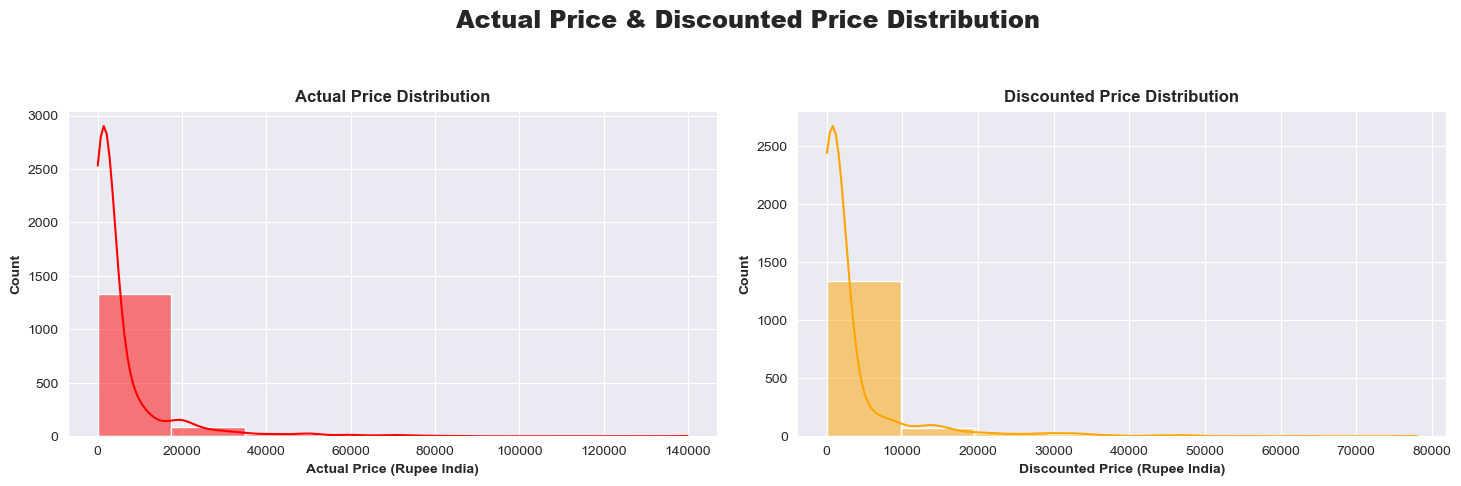

In [50]:
#Actual Price & Discounted Price Distribution

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle('Actual Price & Discounted Price Distribution', fontweight='heavy', size='xx-large')

fig.tight_layout(pad=3.0)

sns.histplot(ax=ax[0], data=df1, x='actual_price', bins=8, kde=True, color='red')
sns.histplot(ax=ax[1], data=df1, x='discounted_price', bins=8, kde=True, color='orange')

ax[0].set_xlabel('Actual Price (Rupee India)', fontweight='bold')
ax[1].set_xlabel('Discounted Price (Rupee India)', fontweight='bold')

ax[0].set_ylabel('Count', fontweight='bold')
ax[1].set_ylabel('Count', fontweight='bold')

ax[0].set_title('Actual Price Distribution', fontweight='bold')
ax[1].set_title('Discounted Price Distribution', fontweight='bold')

plt.show()

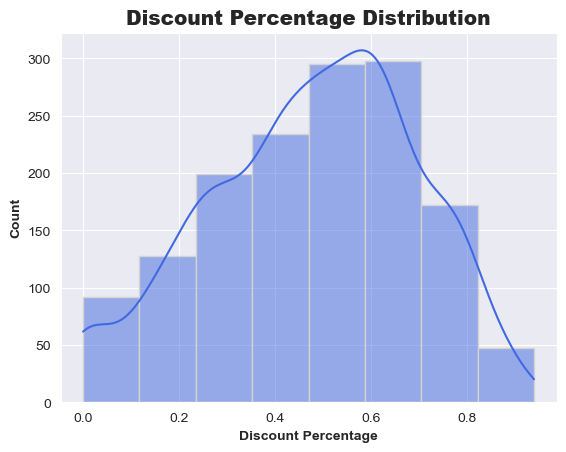

In [51]:
# Create a histogram with a light gray border
disc_hist = sns.histplot(data=df1, x='discount_percentage', bins=8, kde=True, color='royalblue', edgecolor='lightgray')  # Light gray border

disc_hist.set_xlabel('Discount Percentage', fontweight='bold')
disc_hist.set_ylabel('Count', fontweight='bold')
disc_hist.set_title('Discount Percentage Distribution', fontweight='heavy', size='x-large')

plt.show()

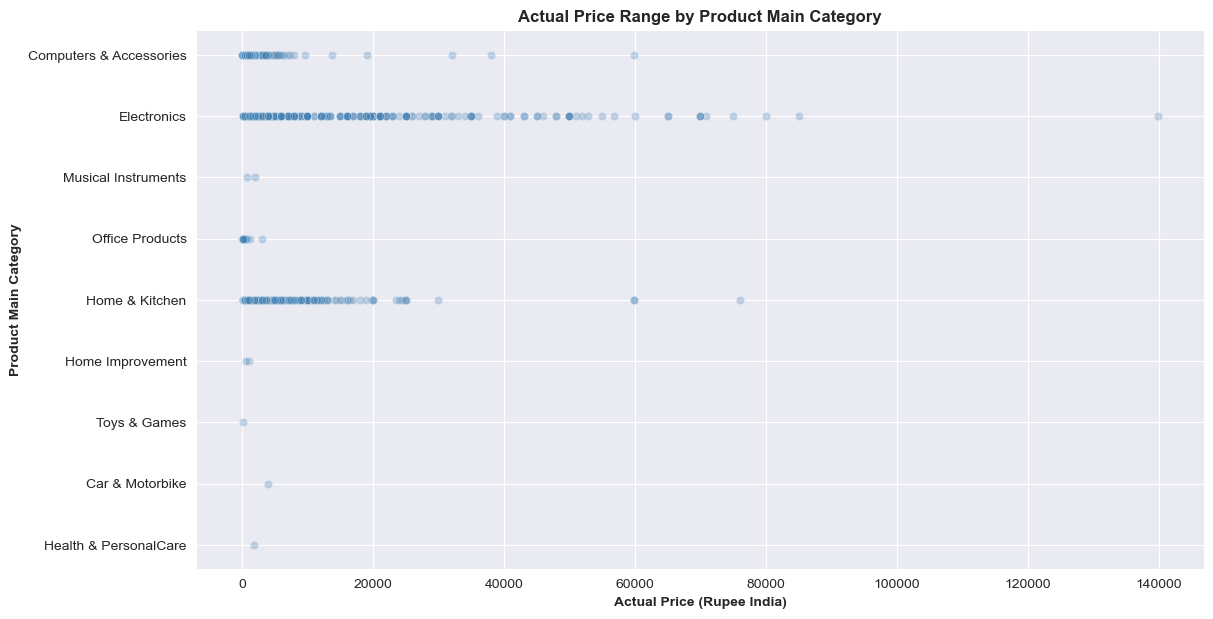

In [52]:
# Scatterplot for Actual Price Range by Product Main Category
fig, ax = plt.subplots(figsize=(13, 7))  # Adjust the figure size
sns.scatterplot(data=df1, x='actual_price', y='category_1', alpha=0.3, color='steelblue', ax=ax)

ax.set_xlabel('Actual Price (Rupee India)', fontweight='bold')
ax.set_ylabel('Product Main Category', fontweight='bold')
ax.set_title('Actual Price Range by Product Main Category', fontweight='bold', size='large')

plt.show()

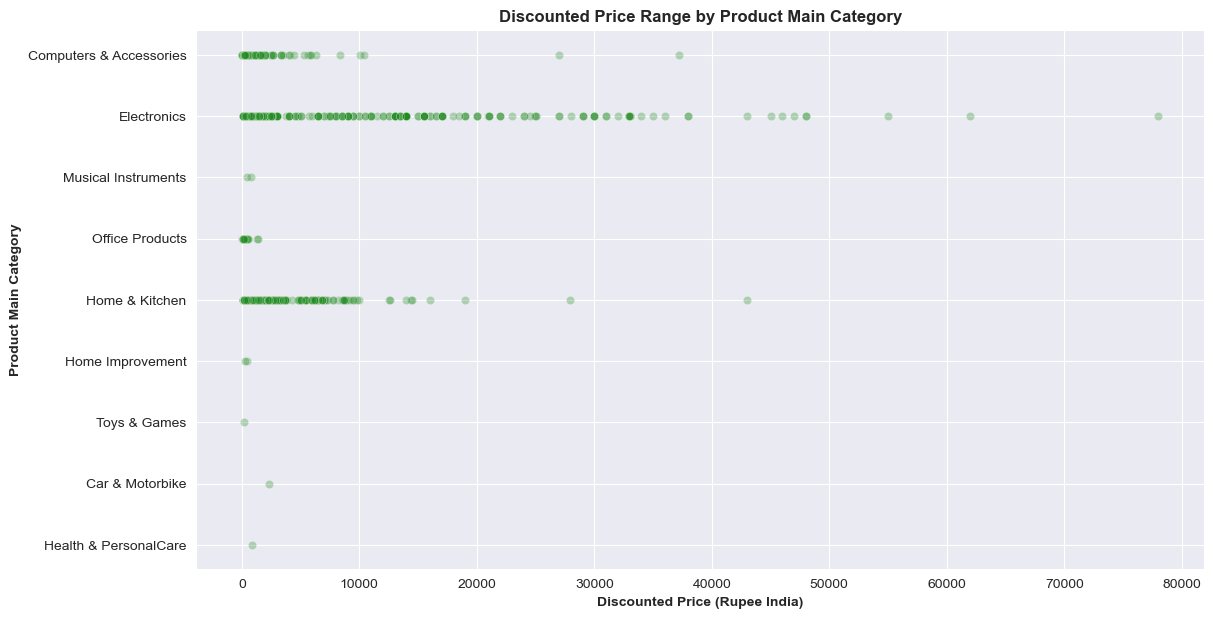

In [53]:
# Scatterplot for Discounted Price Range by Product Main Category
fig, ax = plt.subplots(figsize=(13, 7))  # Adjust the figure size
sns.scatterplot(data=df1, x='discounted_price', y='category_1', alpha=0.3, color='forestgreen', ax=ax)

ax.set_xlabel('Discounted Price (Rupee India)', fontweight='bold')
ax.set_ylabel('Product Main Category', fontweight='bold')
ax.set_title('Discounted Price Range by Product Main Category', fontweight='bold', size='large')

plt.show()

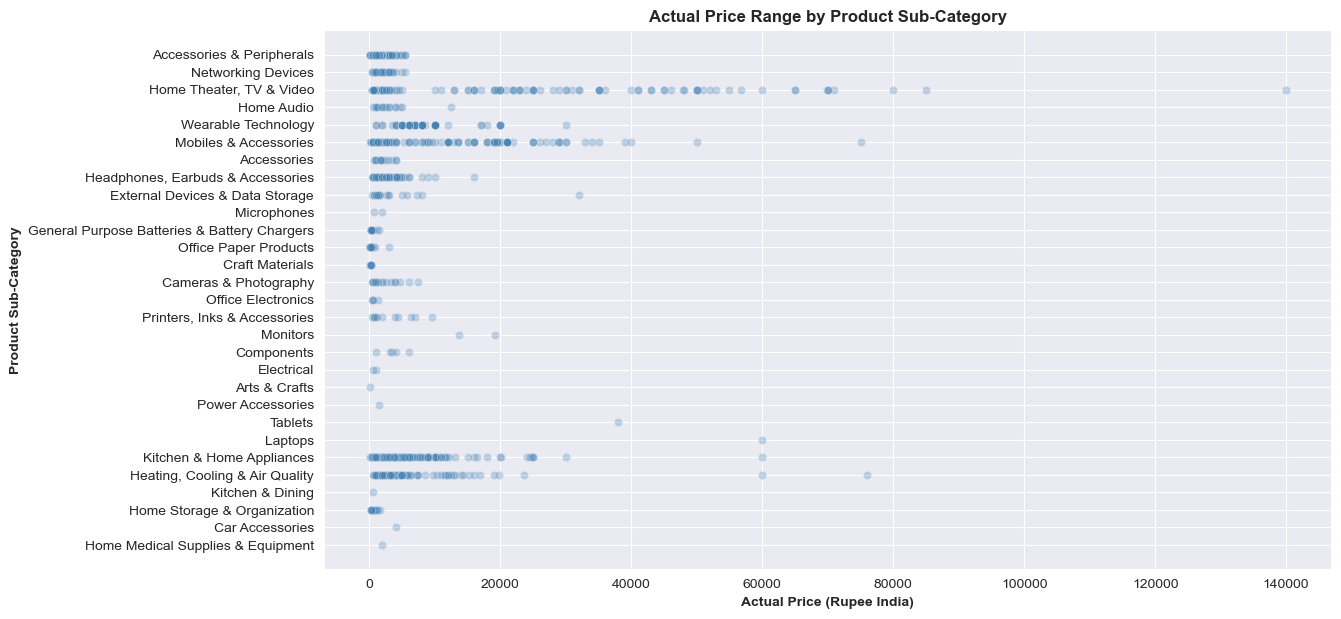

In [54]:
# Scatterplot for Actual Price Range by Product Sub-Category
fig, ax = plt.subplots(figsize=(13, 7))  # Set figure size
sns.scatterplot(data=df1, x='actual_price', y='category_2', alpha=0.3, color='steelblue', ax=ax)

ax.set_xlabel('Actual Price (Rupee India)', fontweight='bold')
ax.set_ylabel('Product Sub-Category', fontweight='bold')
ax.set_title('Actual Price Range by Product Sub-Category', fontweight='bold', size='large')

plt.show()

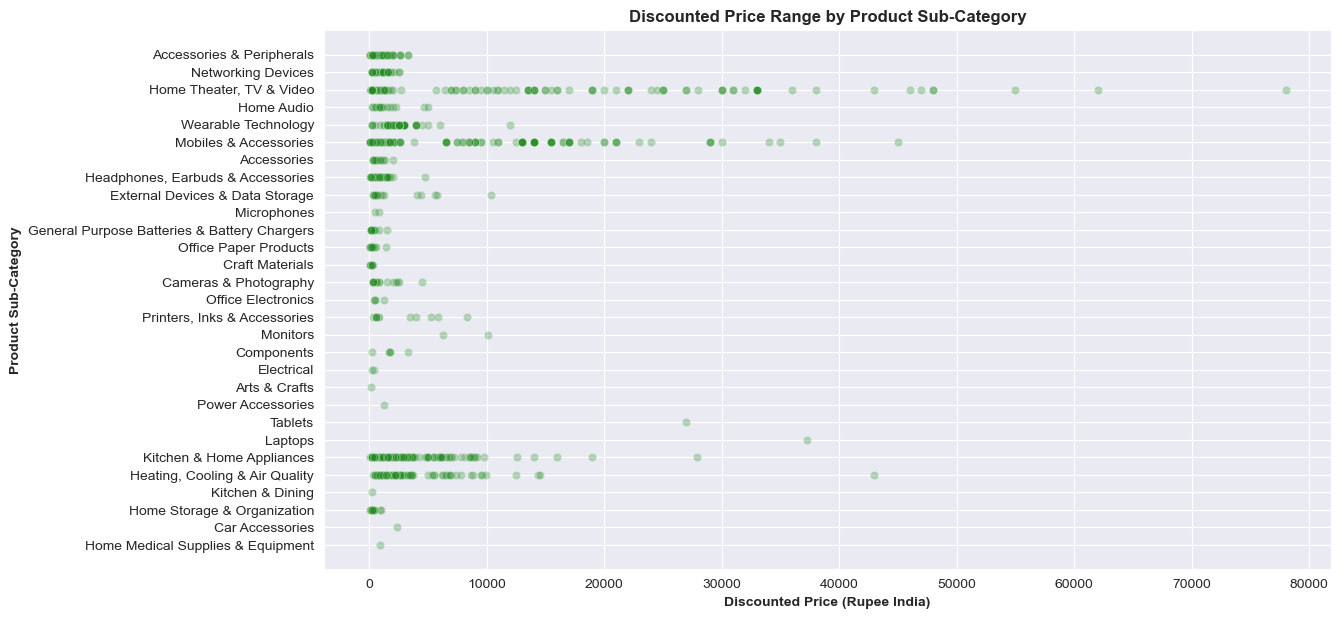

In [55]:
# Scatterplot for Discounted Price Range by Product Sub-Category
fig, ax = plt.subplots(figsize=(13, 7))  # Set figure size
sns.scatterplot(data=df1, x='discounted_price', y='category_2', alpha=0.3, color='forestgreen', ax=ax)

ax.set_xlabel('Discounted Price (Rupee India)', fontweight='bold')
ax.set_ylabel('Product Sub-Category', fontweight='bold')
ax.set_title('Discounted Price Range by Product Sub-Category', fontweight='bold', size='large')

plt.show()